 ###  <h1><center>Vehicle Damage Inspection</center></h1>    


Significant time is spent by auto insurance adjusters to appraise vehicle loss and estimate the final settlement amount. Large volume of minor loss claims consume significant bandwidth of adjusters. A machine learning model can reduce this amount by inspecting and identifying type of damage after car accident.

In [1]:
# Import required libraries
import os
import cv2
import numpy as np
import json
import boto3
import random

In [2]:
from matplotlib import pyplot as plt
def show_image(temp):
    plt.figure()
    plt.imshow(temp)
    plt.show()

### Provide endpoint name

In [3]:
ENDPOINT_NAME = 'Demo-Vehicle-Damage-Inspection-Endpoint'

### Make Predictions

Provide any of the following as input image to the model

In [4]:
Test_img = 'Broken_Windshield.jpg'

# Test_img = 'Broken_Headlight.jpg'
# Test_img = 'Frontal_Damage.jpg'
# Test_img = 'No_Damage.jpg'

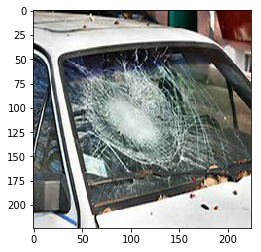

In [5]:
temp=cv2.imread(Test_img)
test_img=cv2.cvtColor(temp,cv2.COLOR_BGR2RGB) 
show_image(test_img)

In [6]:
# encode image as jpeg
_, img_encoded = cv2.imencode('.jpg', temp)
payload = img_encoded.tostring()

sagemaker = boto3.client('runtime.sagemaker')
result = sagemaker.invoke_endpoint(
    EndpointName=ENDPOINT_NAME,
    ContentType='image/jpeg',
    Body=payload)


### Display The Output

In [7]:
result['Body'].read().decode()

u'{"Results": "image classified with following details : probability=0.000000, class=Broken_Headlight and probability=0.999999, class=Broken_Windshield and probability=0.000000, class=Frontal_Damage and probability=0.000001, class=No_Damage"}'

© 2018 Persistent Systems